# CADUTA LIBERA

$h = \frac{1}{2}gt^2 \Rightarrow B = \frac{1}{2}g \Rightarrow g = 2B$

[0.01971216 0.02927521 0.03940225 0.04941729 0.05958481 0.07017201
 0.08099716 0.08946081 0.10061584 0.11042329 0.12131289 0.13118884
 0.13927824] [0.00027282 0.00032626 0.00033334 0.00042202 0.00047559 0.00053743
 0.00071184 0.0004591  0.00069379 0.00063085 0.00080064 0.00098156
 0.00027526]

linearità A + BX
    
A: 0.0009135356871497368 
B: 4.94708127579513
sigmaA: 0.002161196179698952
sigmaB: 0.024408089771415595

sigmaY: 0.0038823863212941005
chiquadro ridotto: 0.73
df: 11
    



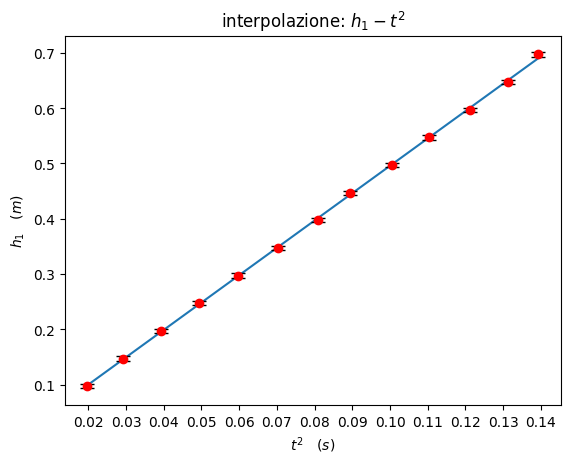

g:  9.894 ± 0.049 


In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from interpolazione3 import RettaInterpolata, final_val
import os

FILE = os.path.abspath('') + '/../CSV/' + 'caduta_libera.csv'
fr = pd.read_csv(FILE)

h = np.array([10,15,20,25,30,35,40,45,50,55,60,65,70])

t = []
err_t = []
for i in h:
    colonna = np.array(fr[str(i)])
    t.append(np.mean(colonna))
    err_t.append(np.std(colonna)/np.sqrt(len(colonna)))

t = np.array(t)/1000 # s
err_t = np.array(err_t)/1000 # s

h = h*0.01 + 0.004 + 0.009 - 0.016 # correzioni pedana TODO: verificare correzioni pedana
sigmaH = 0.002 # m incertezza relativa allo strumento di misura

# print(t**2,t*err_t*2)

r = RettaInterpolata(t**2,h,sigmaH) # propagato err_t
print(r)
plt.title("interpolazione: $h_1 - t^{2}$")
plt.plot(r.x_best,r.y_best)
plt.errorbar(t**2,h,fmt='o',yerr=r.sigmaY,color="red",ecolor="black",capsize=5)
plt.xticks(np.round(t**2,2))
plt.ylabel('$h_1\quad(m)$')
plt.xlabel('$t^{2}\quad(s)$')
plt.show()

g = 2*r.B
sigmag = 2*r.sigmaB

print('g: ',final_val(g,sigmag,decimals=3))